### Importing the Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset


In [2]:
dataset = pd.read_csv('dataset/dataset2.csv', header = None)
dataset.columns = dataset.iloc[0]
dataset = dataset[1:]
dataset = dataset.drop(columns=['Year'])

### Encoding Categorical Data


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['District'] = label_encoder.fit_transform(dataset['District'])
headers = [
    'District','Temperature', 'Rainfall', 'Humidity', 'Total'
]
headers_test = [
    'District', 'Temperature', 'Rainfall', 'Humidity'
]

# dataset = pd.DataFrame(dataset, columns=headers)

### Handling Missing Values


In [4]:
# dataset = dataset.apply(pd.to_numeric, errors='coerce')
# # dataset.interpolate(method='linear', inplace=True)
# # dataset.fillna(method='ffill', inplace=True)
# # dataset.fillna(dataset.mode(), inplace=True)
# dataset.ffill(inplace=True)
# # dataset.fillna(dataset.median(), inplace=True)
# dataset.fillna(dataset.mode().iloc[0], inplace=True)
# # dataset.fillna(dataset.mean(), inplace=True)

# dataset['Total Cases'] = dataset.iloc[:, 37:49].sum(axis=1)
# dataset = dataset.drop(dataset.columns[37:49], axis=1)

### Test/Train Split


In [5]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 0:-1].values
Y = dataset.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Hyperparameter Tuning


In [6]:
# from xgboost import XGBRegressor
# from skopt import BayesSearchCV
# from skopt.space import Real, Integer

# param_grid = {
# 'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
# 'max_depth': Integer(3, 10),
# 'n_estimators': Integer(50, 500),
# 'min_child_weight': Integer(1, 10),
# 'subsample': Real(0.5, 1.0),
# 'colsample_bytree': Real(0.5, 1.0),
# 'gamma': Real(0.0, 5.0),
# 'reg_alpha': Real(0.0, 1.0),
# 'reg_lambda': Real(1.0, 10.0)
# }

# # Initialize the BayesSearchCV object
# opt = BayesSearchCV(
#     estimator=XGBRegressor(),
#     search_spaces=param_grid,
#     n_iter=32,
#     cv=5,
#     n_jobs=-1,
#     verbose=1,
#     n_points=1,
#     random_state=0,
#     return_train_score=False
# )

# opt.fit(X_train, Y_train)

# print(opt.best_params_)


#### Bayesian Optimization


In [7]:
# import optuna
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# # Define the objective function for Optuna
# def objective(trial):
#     # Suggest hyperparameters
#     param = {
#         "n_estimators": trial.suggest_int("n_estimators", 50, 500),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 10),
#         "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "gamma": trial.suggest_float("gamma", 0.0, 5.0),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 1.0, 10.0),
#     }

#     # Create and train the model with suggested parameters
#     model = xgb.XGBRegressor(**param, random_state=42, n_jobs=-1)
#     model.fit(X_train, Y_train)

#     # Make predictions and calculate RMSE
#     y_pred = model.predict(X_test)
#     rmse = mean_squared_error(Y_test, y_pred, squared=False)

#     return rmse

# # Create an Optuna study and optimize it
# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=50)

# # Print the best parameters and RMSE
# print(f"Best parameters: {study.best_params}")
# print(f"Best RMSE: {study.best_value}")



#### Random Search


In [8]:
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error

# # Define the parameter grid for Random Search
# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 500],
#     'learning_rate': np.linspace(0.01, 0.3, 10),
#     'max_depth': [3, 5, 7, 9, 10],
#     'min_child_weight': [1, 3, 5, 7, 10],
#     'subsample': np.linspace(0.5, 1.0, 6),
#     'colsample_bytree': np.linspace(0.5, 1.0, 6),
#     'gamma': np.linspace(0, 5, 10),
#     'reg_alpha': np.linspace(0, 1, 5),
#     'reg_lambda': np.linspace(1, 10, 5),
# }

# # Initialize the XGBoost regressor
# xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid,
#     n_iter=50,  # Number of random combinations to try
#     scoring='neg_mean_squared_error',  # Metric for evaluation
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1,  # Utilize all CPU cores
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, Y_train)

# # Get the best parameters and model performance
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best RMSE: {np.sqrt(-random_search.best_score_)}")

# # Evaluate the model on the test set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_rmse = mean_squared_error(Y_test, y_pred, squared=False)
# print(f"Test RMSE: {test_rmse}")

### Training Model


In [9]:
import xgboost as xgb
# regressor = xgb.XGBRegressor(colsample_bytree=1, learning_rate=0.042222222222222223,
#                            max_depth=7, alpha=10, n_estimators=500, min_child_weight=1, subsample=0.5, gamma=3.3333333333333335, reg_alpha=0, reg_lambda=1)

# regressor = xgb.XGBRegressor(colsample_bytree=0.7857872949109472, learning_rate=0.010344501343048346,
#                            max_depth=10, alpha=10, n_estimators=257, min_child_weight=2, subsample=0.850598292345319, gamma=3.1518448315907417, reg_alpha=0.9279458085493363, reg_lambda=7.180908650941852)

# regressor = xgb.XGBRegressor(colsample_bytree=0.7, learning_rate=0.042222222222222223,
#                            max_depth=10, alpha=10, n_estimators=50, min_child_weight=1, subsample=1, gamma=2.7777777777777777, reg_alpha=0.5, reg_lambda=10)

# OrderedDict({'colsample_bytree': 0.5, 'gamma': 0.9428743048516728, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 50, 'reg_alpha': 1.0, 'reg_lambda': 10.0, 'subsample': 0.8724618188077347})

# regressor = xgb.XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=7, alpha=10, n_estimators=50, min_child_weight=10, subsample=0.8724618188077347, gamma=0.9428743048516728, reg_alpha=1.0, reg_lambda=10.0)

regressor = xgb.XGBRegressor()

regressor.fit(X, Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Comparing Values


In [10]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))


[[336.6292419433594 '336']
 [474.83111572265625 '493']
 [6854.5966796875 '6950']
 [1426.7994384765625 '1448']
 [2861.388916015625 '2841']
 [472.76275634765625 '491']
 [17.84606170654297 '27']
 [108.7953872680664 '1']
 [20.745447158813477 '10']
 [283.58709716796875 '277']
 [3412.443359375 '3397']
 [73.02865600585938 '77']
 [108.6751708984375 '82']
 [130.98365783691406 '96']
 [159.16635131835938 '140']
 [-6.764875411987305 '10']
 [5582.85595703125 '5620']
 [722.6093139648438 '762']
 [2052.6591796875 '2127']
 [70.25581359863281 '67']
 [-3.5815837383270264 '0']
 [322.7900085449219 '318']
 [21.832870483398438 '0']
 [96.29344940185547 '108']
 [82.4254379272461 '91']
 [4448.28564453125 '4533']
 [377.2337341308594 '361']
 [314.6688232421875 '288']
 [26.068960189819336 '0']
 [9.426231384277344 '0']
 [6296.96630859375 '6348']
 [649.7808227539062 '630']
 [20.247398376464844 '0']
 [463.71575927734375 '466']
 [-3.1377079486846924 '0']
 [248.86862182617188 '242']
 [353.4327392578125 '335']
 [47.7016

### Evaluating Model Performance

#### R Square Value

In [11]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9997988343238831

#### Mean Squared Percentage Error

In [12]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true, dtype=float), np.array(y_pred, dtype=float)
    non_zero_indices = y_true != 0
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100


mean_absolute_percentage_error(Y_test, Y_pred)

173.55759062484765

#### Residual Plot

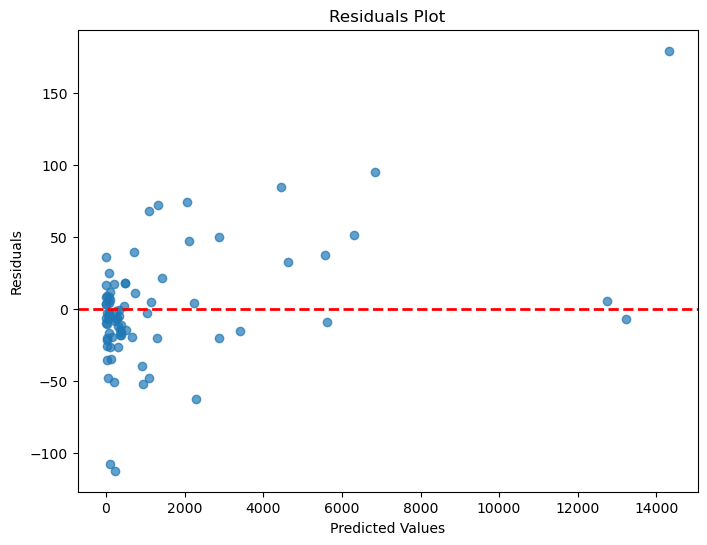

In [13]:
# Convert 'answers' to a numeric type, handling any potential errors
answers_numeric = pd.to_numeric(Y_test, errors='coerce')  # This converts values to float, setting non-numeric ones to NaN

# Drop any NaN values if there were non-numeric entries in 'answers'
mask = ~np.isnan(answers_numeric)
answers_cleaned = answers_numeric[mask]
y_pred_cleaned = Y_pred[mask]

# Calculate residuals
residuals = answers_cleaned - y_pred_cleaned

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_cleaned, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

#### Scatter Plot

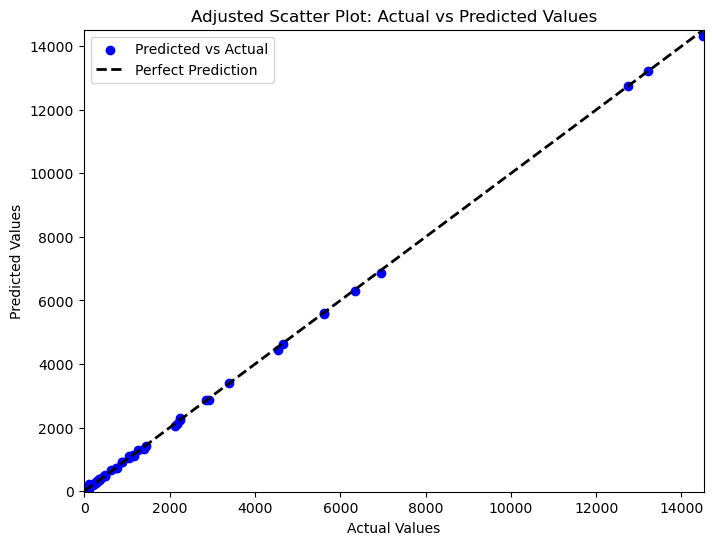

In [14]:
Y_test = Y_test.astype(float)
Y_pred = Y_pred.astype(float)

# Scatter plot with adjusted axis range
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')

# Diagonal line to indicate perfect predictions
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Set axis limits based on min and max values of actual and predicted data
plt.xlim(min(Y_test.min(), Y_pred.min()) - 10, max(Y_test.max(), Y_pred.max()) + 10)
plt.ylim(min(Y_test.min(), Y_pred.min()) - 10, max(Y_test.max(), Y_pred.max()) + 10)

# Axis labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Adjusted Scatter Plot: Actual vs Predicted Values')
plt.legend()
plt.show()



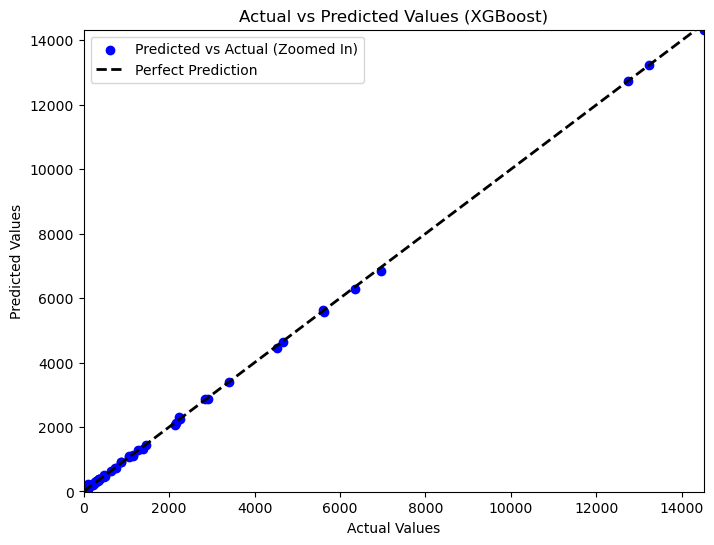

In [15]:
Y_test = Y_test.astype(float)
Y_pred = Y_pred.astype(float)

# Focus on the lower range (first 10% of the data or below 0.2e6)
mask = (Y_test <= 0.2e6)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test[mask], Y_pred[mask], color='blue', label='Predicted vs Actual (Zoomed In)')

# Diagonal line for perfect prediction
plt.plot([Y_test[mask].min(), Y_test[mask].max()],
         [Y_test[mask].min(), Y_test[mask].max()], 'k--', lw=2, label='Perfect Prediction')

# Axis limits adjusted to the zoomed section
plt.xlim(Y_test[mask].min(), Y_test[mask].max())
plt.ylim(Y_pred[mask].min(), Y_pred[mask].max())

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (XGBoost)')
plt.legend()
plt.show()

#### Training vs Validation Error

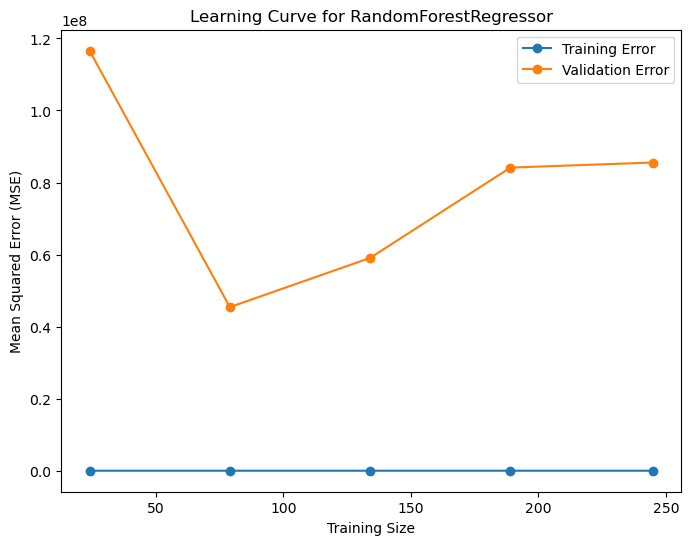

In [16]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    regressor, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error', marker='o')
plt.plot(train_sizes, -val_scores.mean(axis=1), label='Validation Error', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curve for RandomForestRegressor')
plt.legend()
plt.show()


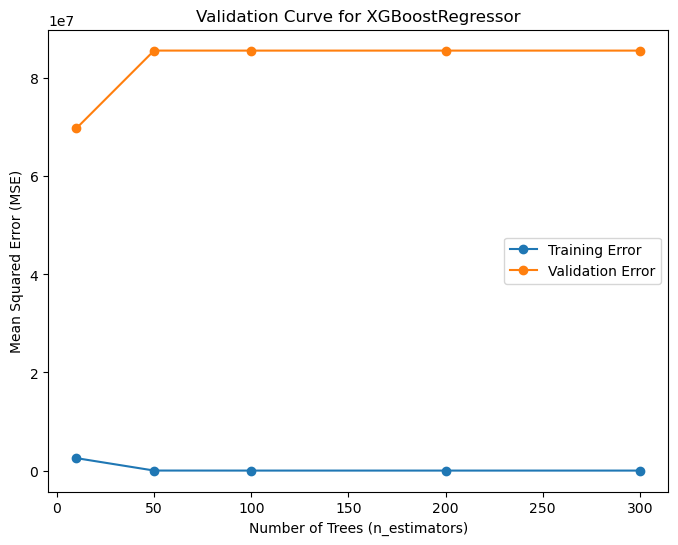

In [17]:
from sklearn.model_selection import validation_curve

# Define the range of n_estimators to evaluate
param_range = [10, 50, 100, 200, 300]

# Generate the validation curve
train_scores, val_scores = validation_curve(
    regressor, X_train, Y_train, param_name='n_estimators', param_range=param_range,
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, -train_scores.mean(axis=1), label='Training Error', marker='o')
plt.plot(param_range, -val_scores.mean(axis=1), label='Validation Error', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validation Curve for XGBoostRegressor')
plt.legend()
plt.show()


### SHAP

In [18]:
import shap
explainer = shap.TreeExplainer(regressor)
X_test = pd.DataFrame(X_test, columns=headers_test[:X_test.shape[1]])
X_test = X_test.apply(pd.to_numeric, errors='coerce')
shap_values = explainer.shap_values(X_test, check_additivity=False)
shap.initjs()

/home/anik/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


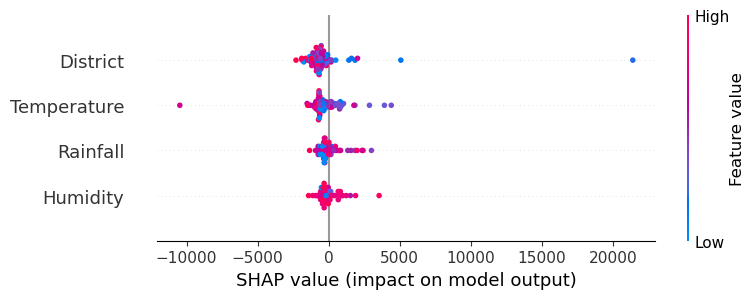

In [19]:
shap.summary_plot(shap_values, X_test) #XGBOOST

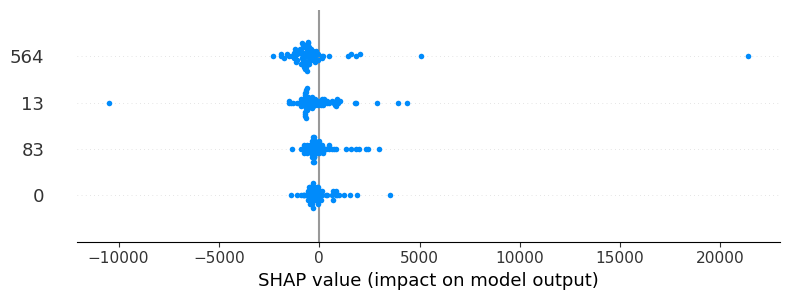

In [20]:
shap.summary_plot(shap_values, Y_train)

In [21]:
shap.dependence_plot(5, shap_values, X_test, feature_names=headers_test) #XGBoost


IndexError: index 5 is out of bounds for axis 1 with size 4

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:100], X_test[:100])


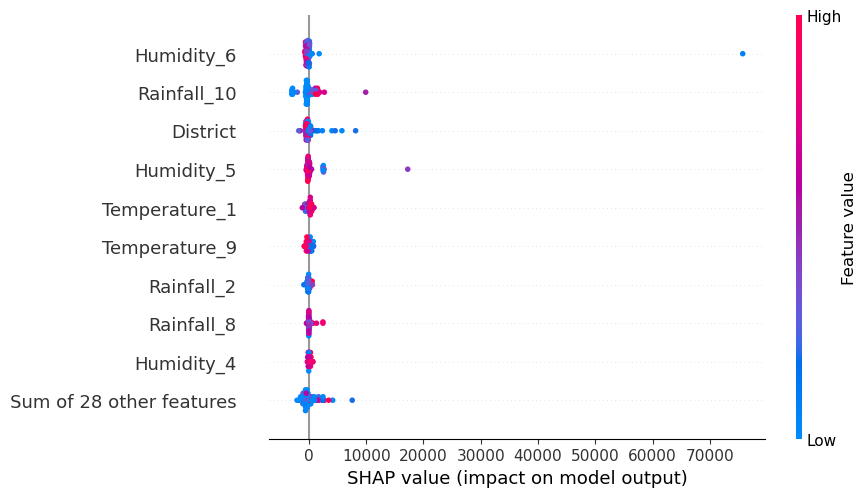

In [ ]:
shap.plots.beeswarm(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test, feature_names=headers_test))


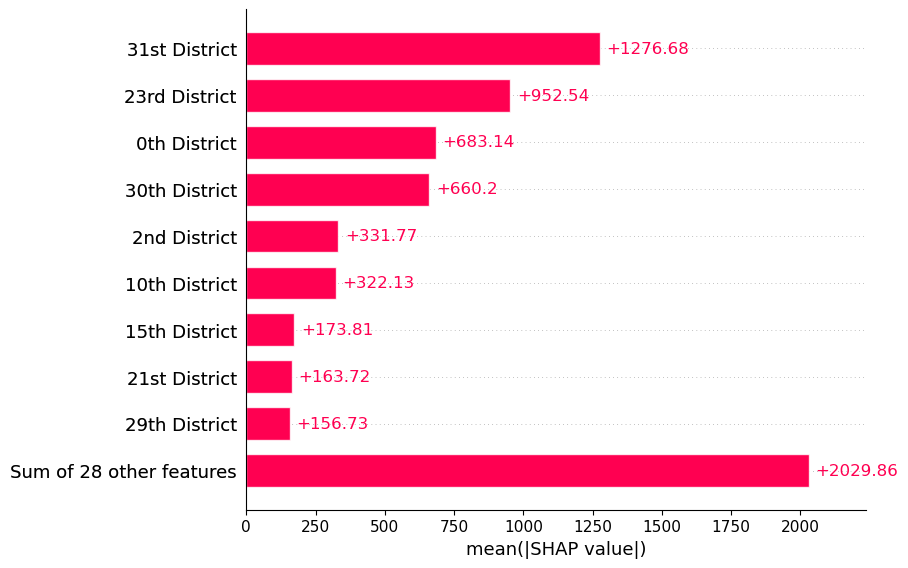

In [ ]:
shap.plots.bar(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test, feature_names=headers_test))
#XGBoost

In [ ]:
shap.plots.force(explainer.expected_value, shap_values[0])


In [ ]:
shap.plots.force(explainer.expected_value, shap_values)


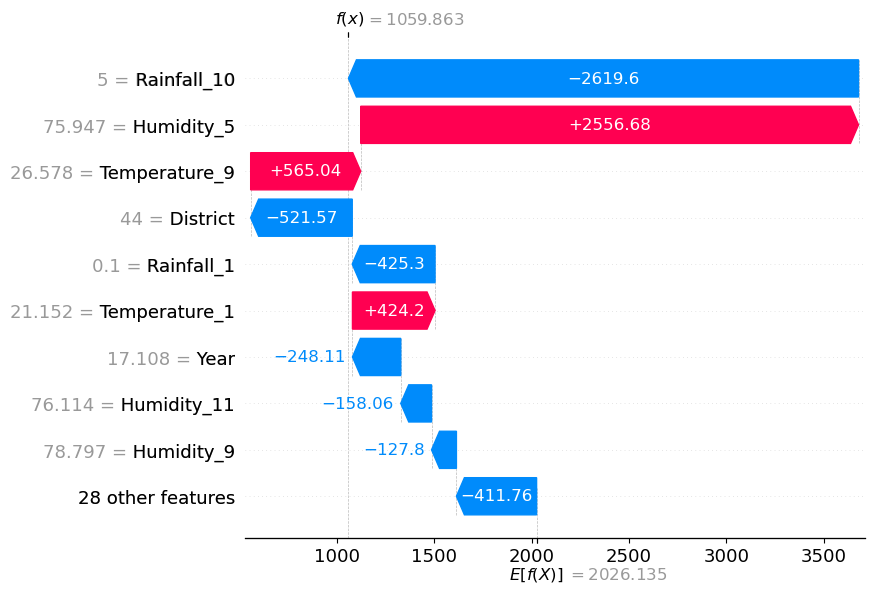

In [ ]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=X_test.iloc[0],  # Using iloc for safe indexing
        feature_names=headers_test
    )
)

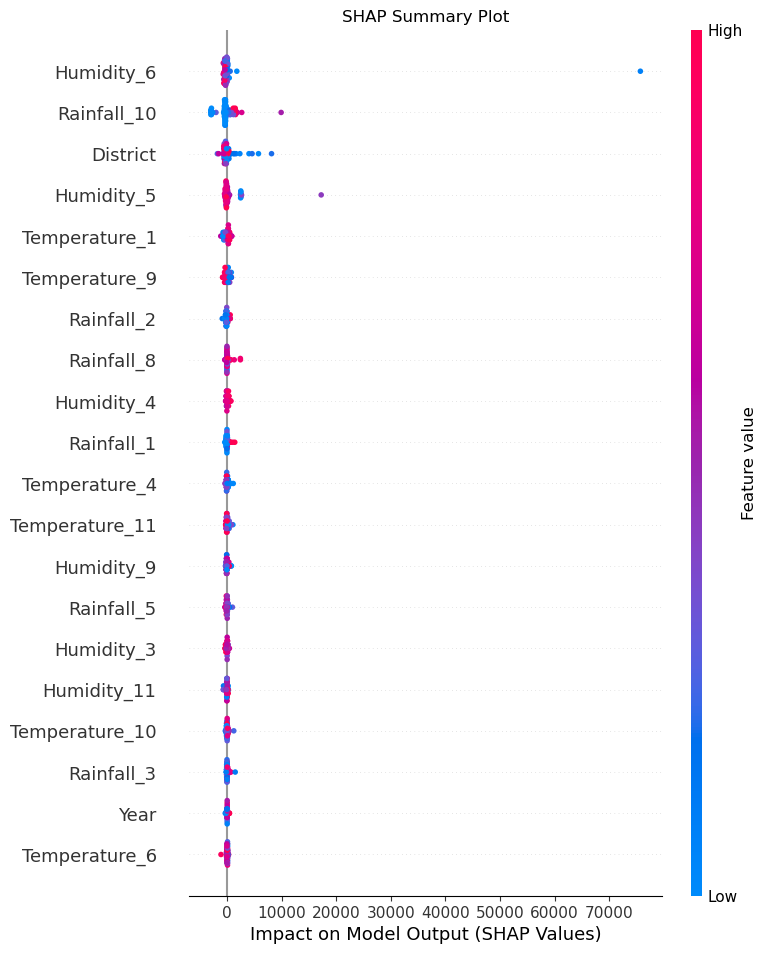

In [ ]:
# Create a custom summary plot with additional labels
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot")
plt.xlabel("Impact on Model Output (SHAP Values)")
plt.show()

### LIME

In [ ]:
# from lime.lime_tabular import LimeTabularExplainer

# # Ensure X_train and X_test are DataFrames
# X_train = pd.DataFrame(X_train, columns=headers_test)  # Adjust column names accordingly
# X_test = pd.DataFrame(X_test, columns=headers_test)

# # 1. Convert all features to numeric (if needed)
# X_train = X_train.apply(pd.to_numeric, errors='coerce')
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# # 2. Handle missing values by filling with column means
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())

# # 3. Ensure there are no infinite values
# X_train = X_train.replace([np.inf, -np.inf], np.nan)
# X_test = X_test.replace([np.inf, -np.inf], np.nan)

# # 4. Fill any remaining NaN values with column means
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())

# # 5. Ensure there are no NaN values left
# assert not X_train.isnull().values.any(), "X_train contains NaN values"
# assert not X_test.isnull().values.any(), "X_test contains NaN values"

# # 6. Initialize the LIME Tabular Explainer with feature names
# explainer = LimeTabularExplainer(
#     training_data=X_train.values,         # Use the training data as a numpy array
#     feature_names=X_train.columns.tolist(),  # Pass feature names from the DataFrame
#     mode='regression'
# )

# # 7. Define a wrapper around the XGBoost model's predict function
# def xgboost_predict(X):
#     return regressor.predict(X)

# # 8. Use LIME to explain a specific instance from the test set
# i = 0  # Index of the test sample to explain
# exp = explainer.explain_instance(
#     data_row=X_test.iloc[i].values,  # Provide the instance as a numpy array
#     predict_fn=xgboost_predict  # Use the wrapped predict function
# )

# # 9. Display the explanation in the notebook
# exp.show_in_notebook(show_table=True)


### Boruta

In [ ]:
# from boruta import BorutaPy

# # Ensure X is a DataFrame
# X_df = pd.DataFrame(X)

# # Fill missing values in X with the mean of each column
# X_df.fillna(X_df.mean(), inplace=True)

# # Check for any remaining NaN values
# if X_df.isnull().sum().sum() > 0:
# 	raise ValueError("Input X still contains NaN values after filling missing values.")

# boruta_selector = BorutaPy(regressor, n_estimators='auto', verbose=2, random_state=42)
# boruta_selector.fit(X_df.values, Y)

In [ ]:
# selected_features = boruta_selector.support_
# selected_features_list = [dataset.columns[i] for i, x in enumerate(selected_features[:dataset.shape[1]]) if x]

# print("Selected Features: ", selected_features_list)